Libraries installation with shell commands

Exploratory Data Analisys of Books.

In [2]:
%pip install pandas numpy seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


Libraries importation:

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm


Dataset Selection  
For this Exploratory data Analysis, I will be utilizing a kindle eBook dataset obtained from Kaggle.  
This dataset contains an array of kindle books with their respective attributes, and we will be focusing on the price, reviews and stars along with other Boolean type information like if it is on kindle unlimited subscription, if it is Bestseller or if it is a GoodReadersChoice.  
This dataset was scraped on October 2023, and it was uploaded by user asaniczka and it can be accessed via the following link:  
https://www.kaggle.com/datasets/asaniczka/amazon-kindle-books-dataset-2023-130k-books  

I chose this dataset because I am an avid reader, and I find it interesting discovering the relations between the different attributes and how that impacts the book reviews, pricing, etc.
  
In the following cells we will be showing the shape of the dataset along with the information about it including the descriptions of its attributes.


Atributes description (These descriptions where obtained directly from the dataset source):  
  
asin: Product ID from Amazon.  
title: Title of the book.  
author: Author(s) of the book.  
soldBy: Seller(s) of the book.  
imgUrl: URL of the book.  
productURL: URL to the publication on wich the ebook is sold.  
stars: Average rating of the book. If 0, no ratings were found.  
reviews: Number of reviews. If 0, no reviews were found.  
price: Price of the book. If 0, price was unavailable.  
isKindleUnlimited: Whether the book is available through Kindle Unlimited.  
category_id: Serial id assigned to the category this book belong to.  
isBestSeller: Whether the book had the Amazon Best Seller status or not.  
isEditorsPick: Whether the book had the Editor's Pick status or not.  
isGoodReadsChoice: Whether the book had the Goodreads Choice status or not.  
publishedDate: Publication date of the book.  
category_name: Name of the book category.

CSV File loading  
For working with this dataset i will be using the pandas library.  
In the next cell it will be loaded and we can apriciate the shape of the dataset.  

In [4]:
df = pd.read_csv('data/kindle_data-v2.csv')
df.shape


(133102, 16)

Atributes of the dataset  
Here we can see all the features of this dataset as described above:

In [5]:
print(df.columns)

Index(['asin', 'title', 'author', 'soldBy', 'imgUrl', 'productURL', 'stars',
       'reviews', 'price', 'isKindleUnlimited', 'category_id', 'isBestSeller',
       'isEditorsPick', 'isGoodReadsChoice', 'publishedDate', 'category_name'],
      dtype='object')


Following the later here is a example of how the dataset is composed using the head() function included with pandas

In [6]:
df.head()

,asin,title,author,soldBy,imgUrl,productURL,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,Amazon.com Services LLC,https://m.media-amazon.com/images/I/713KZTsaYp...,https://www.amazon.com/dp/B00TZE87S4,4.8,0,9.99,False,6,True,False,False,2015-06-01,Parenting & Relationships
1,B08WCKY8MB,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,Penguin Group (USA) LLC,https://m.media-amazon.com/images/I/A1LZcJFs9E...,https://www.amazon.com/dp/B08WCKY8MB,4.4,0,16.99,False,6,False,False,False,2022-02-15,Parenting & Relationships
2,B09KPS84CJ,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,HarperCollins Publishers,https://m.media-amazon.com/images/I/71RIWM0sv6...,https://www.amazon.com/dp/B09KPS84CJ,4.8,0,16.99,False,6,False,True,False,2022-09-13,Parenting & Relationships
3,B07S7QPG6J,Everything I Know About Love: A Memoir,Dolly Alderton,HarperCollins Publishers,https://m.media-amazon.com/images/I/71QdQpTiKZ...,https://www.amazon.com/dp/B07S7QPG6J,4.2,0,9.95,True,6,False,True,False,2020-02-25,Parenting & Relationships
4,B00N6PEQV0,The Seven Principles for Making Marriage Work:...,John Gottman,Random House LLC,https://m.media-amazon.com/images/I/813o4WOs+w...,https://www.amazon.com/dp/B00N6PEQV0,4.7,0,13.99,False,6,False,False,False,2015-05-05,Parenting & Relationships


After loading the dataset into our environment i will aproach it by looking at its data types using the info() function.  
This i think is one of the best aproaches to a dataset because i can instantly identify which of my columns have null values and the data type of each colum which will allow me to devise how to adress them.  
We can also see how many entries (rows) and feaures (columns) we have to work with.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133102 entries, 0 to 133101
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   asin               133102 non-null  object 
 1   title              133102 non-null  object 
 2   author             132677 non-null  object 
 3   soldBy             123869 non-null  object 
 4   imgUrl             133102 non-null  object 
 5   productURL         133102 non-null  object 
 6   stars              133102 non-null  float64
 7   reviews            133102 non-null  int64  
 8   price              133102 non-null  float64
 9   isKindleUnlimited  133102 non-null  bool   
 10  category_id        133102 non-null  int64  
 11  isBestSeller       133102 non-null  bool   
 12  isEditorsPick      133102 non-null  bool   
 13  isGoodReadsChoice  133102 non-null  bool   
 14  publishedDate      84086 non-null   object 
 15  category_name      133102 non-null  object 
dtypes:

As shown before the dataset contains almost non-null information wich can be deceving because as described in the atributes section in most of the numerical attributes the null data is saved as 0.  
With that information in mind i will be utilizing the funtions value_counts() and the fucntion get() to se how many null information we have in the columns og price, reviews and stars. 

In [8]:
print("Price null values:",df['price'].value_counts().get(0, 0))
print("Reviews null values:",df['reviews'].value_counts().get(0, 0))
print("Stars null values:",df['stars'].value_counts().get(0, 0))

Price null values: 4066
Reviews null values: 64670
Stars null values: 3182


As seen on the shape of the dataset we have 133102 rows in the dataset making the 64670 missing values in reviews a concenring amount for the data cleaning and processing.  
And even with that we have several missing values in the price and stars fields that will requiere diffenrent considerations.  
Now because we can follow several paths to deal with this missing values for startes i will be proposing my hypothesys right now based on a simple overview of the data for it to be processed in the pursuit of the analaysis to be made to prove or discard them.  

So for now i will do several pairPlot using seaborn to try and understand how the missing data is distributed and ow it affects the dataset analysis.

Pair plot beteween all the features:

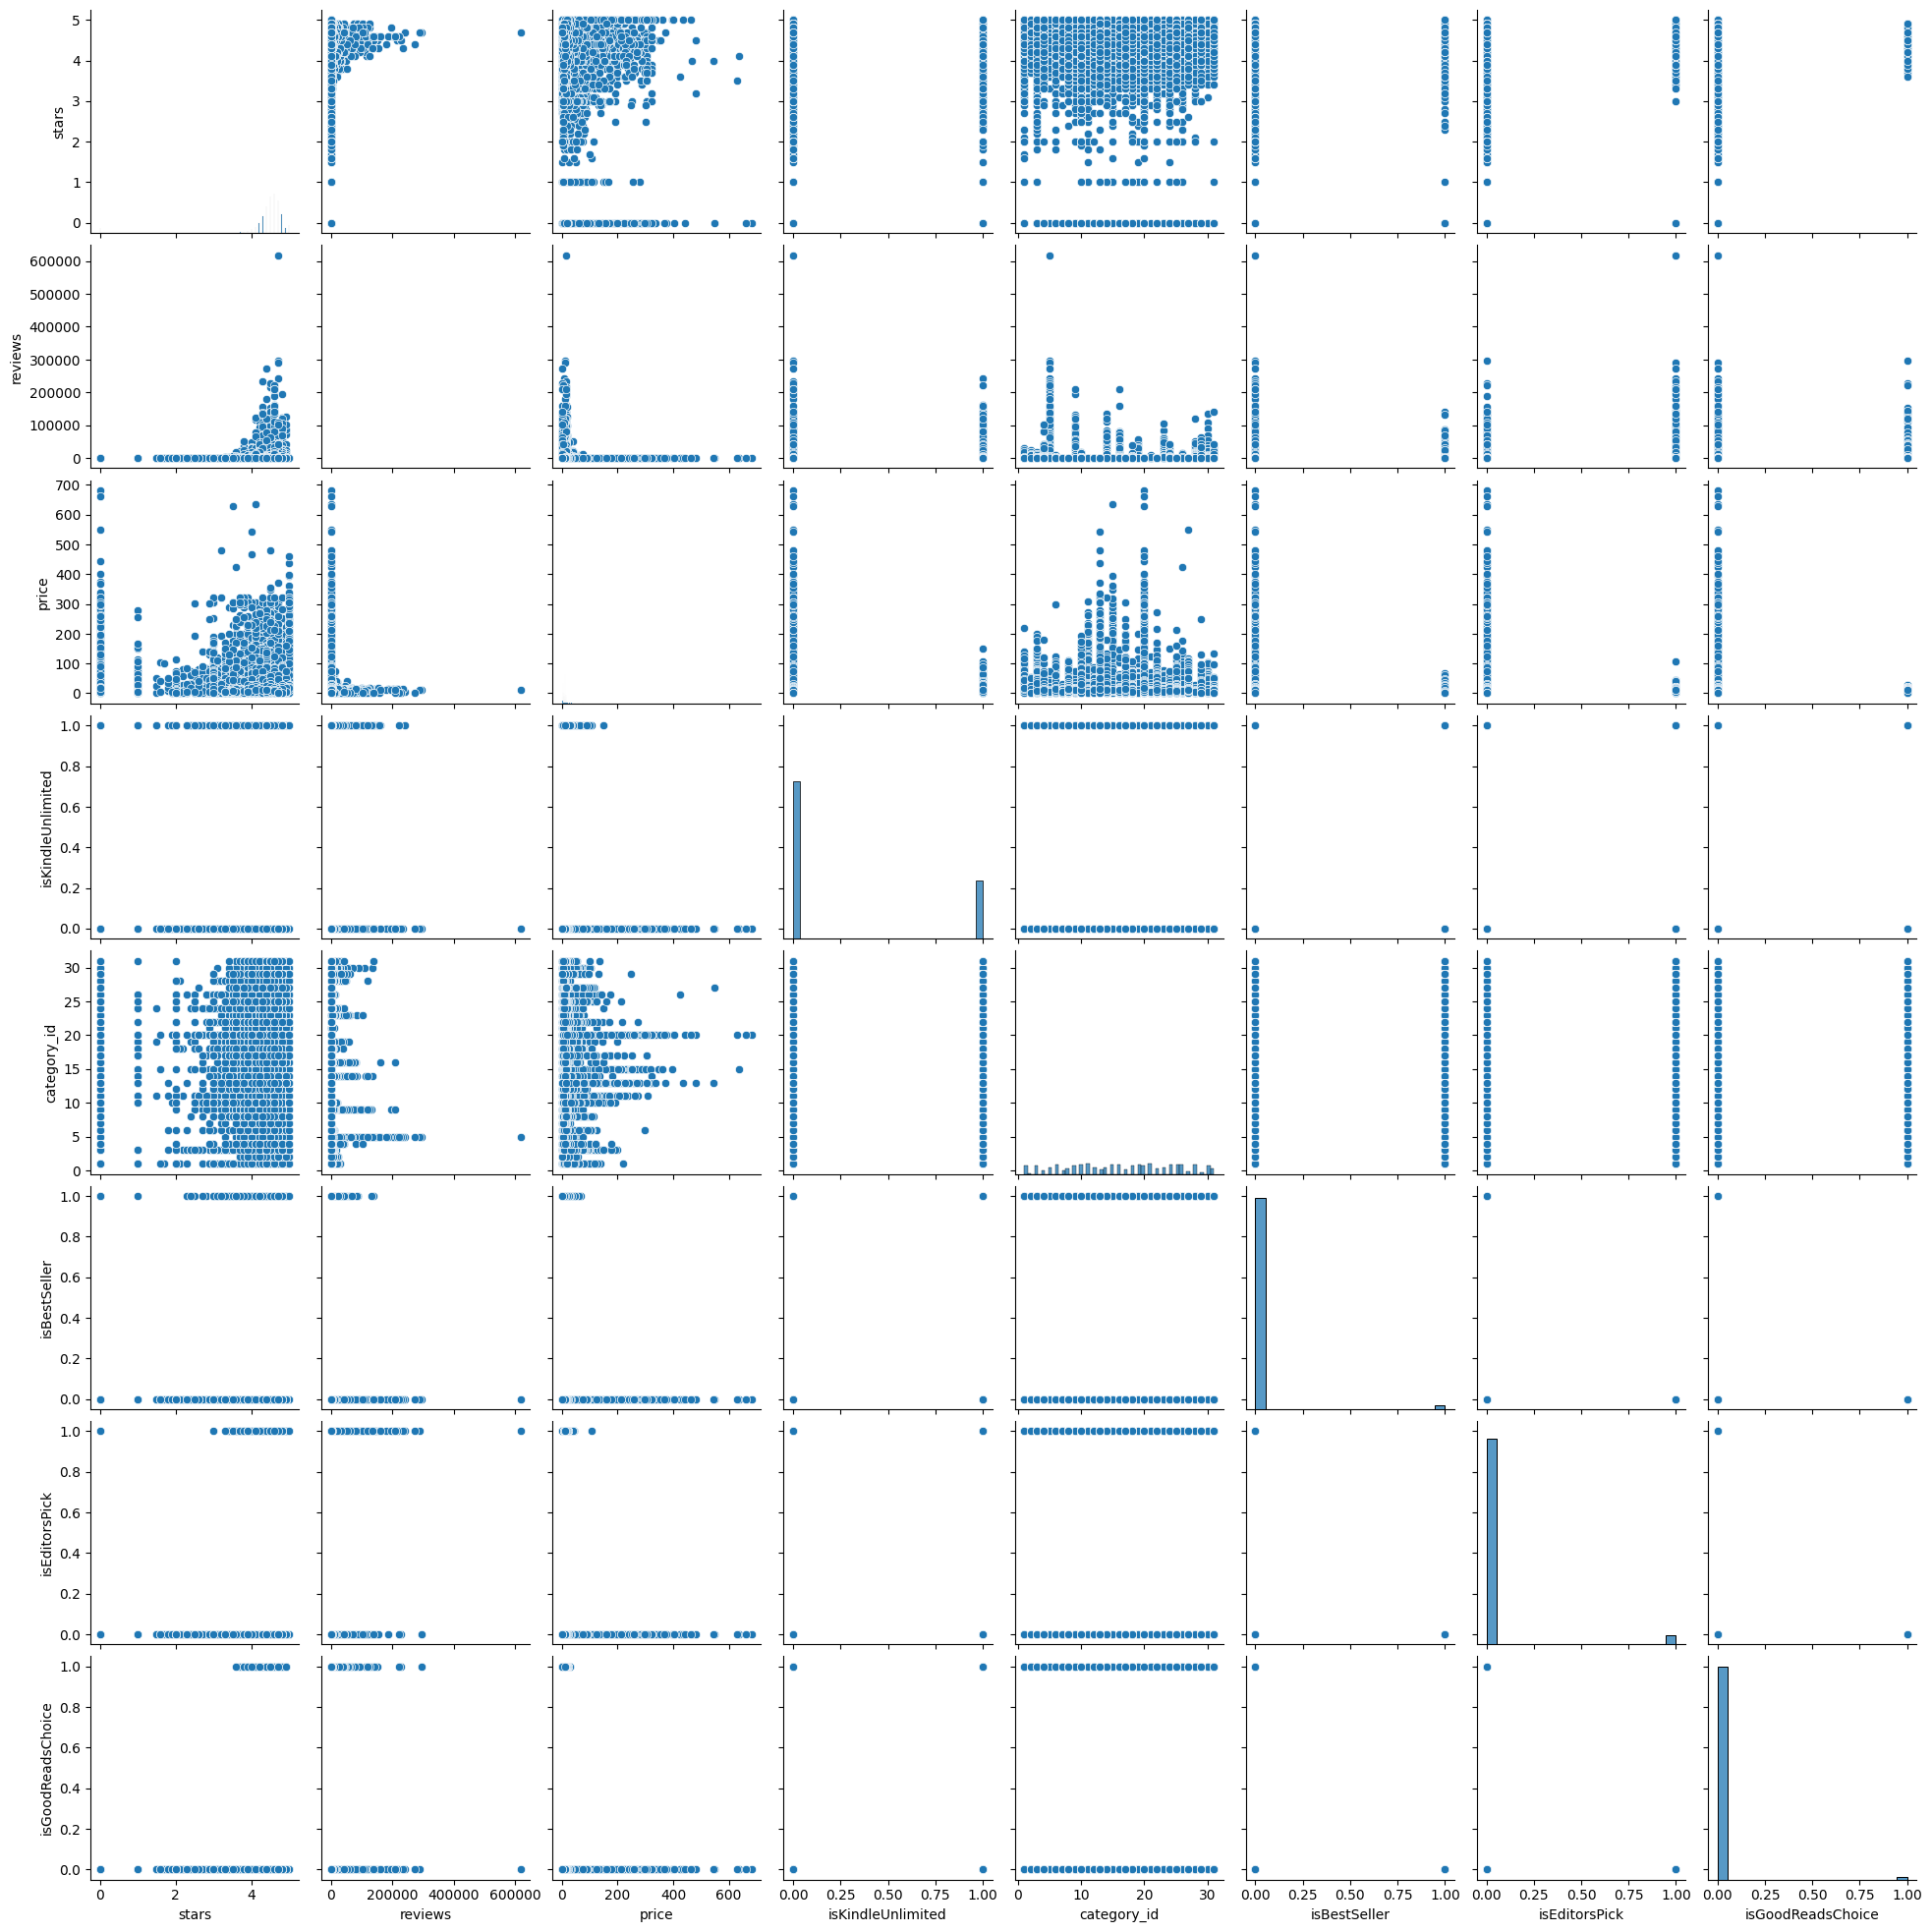

In [8]:
sns.pairplot(df)

Based on the last pairplot i deduce that there are some relations betweeen the data with the missing values and other categorical features such as category.  
Because of that i will create a pair plot of the dataset based on category_name.  

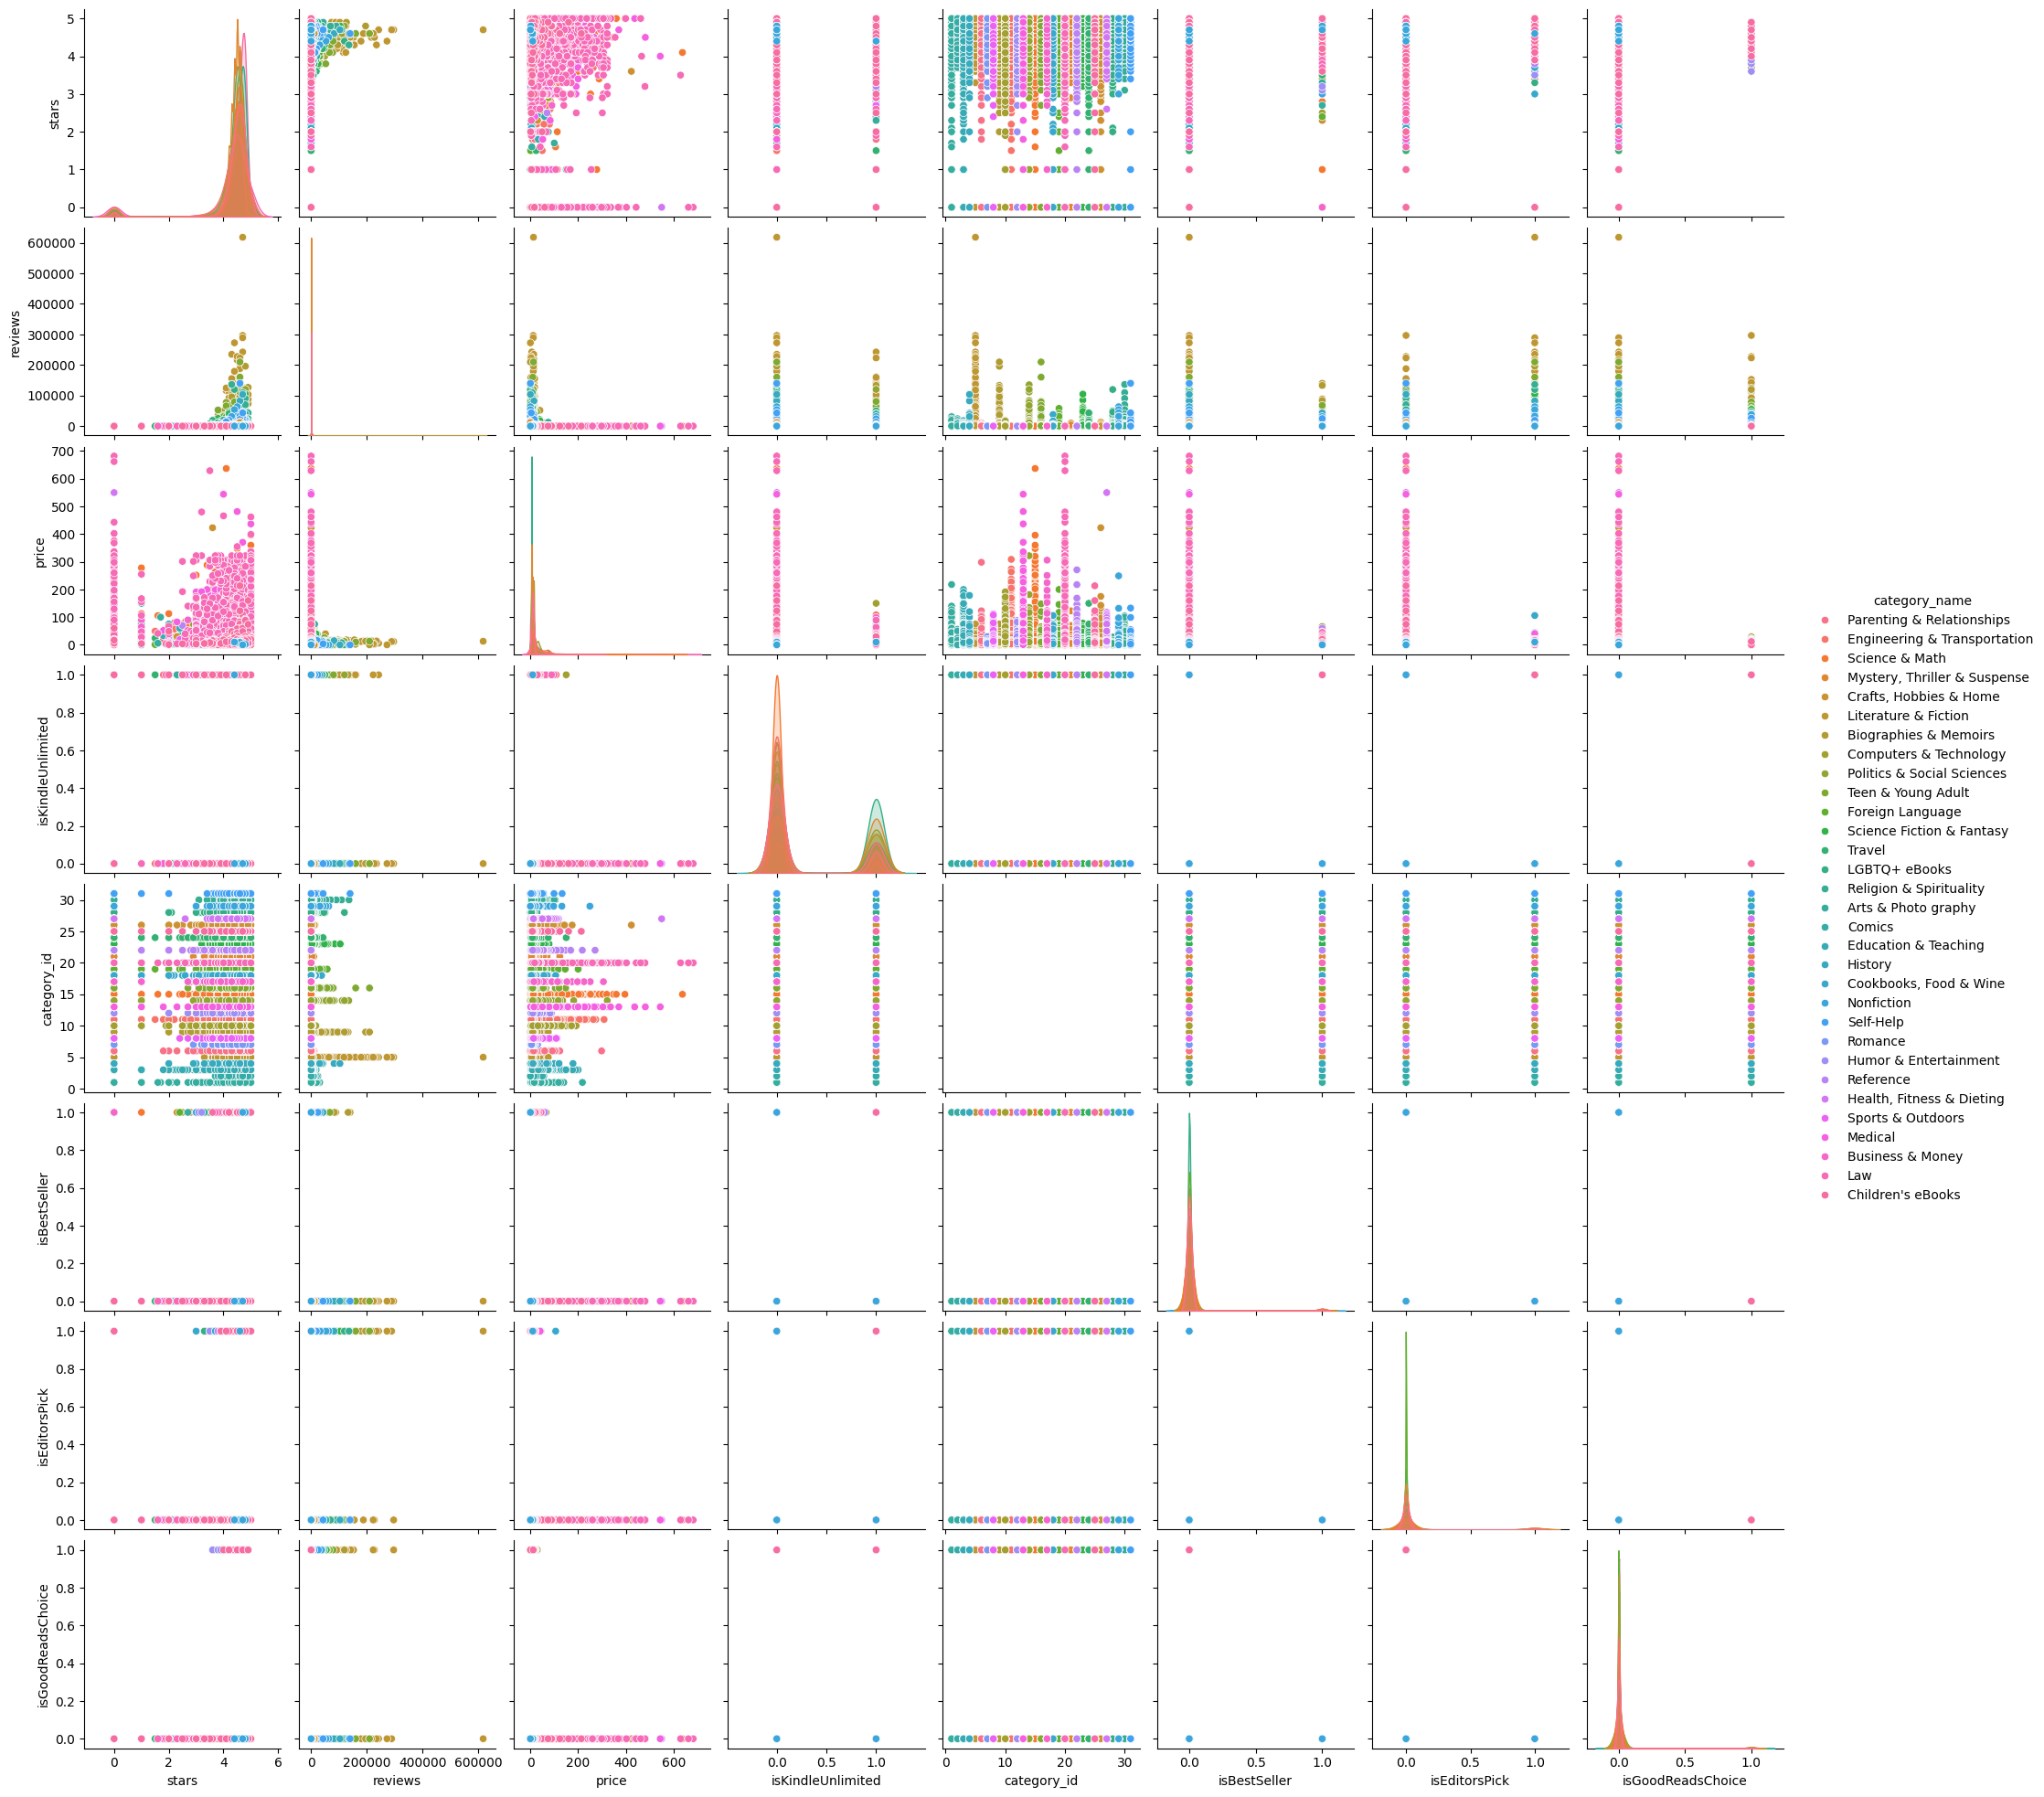

In [9]:
sns.pairplot(df, hue = 'category_name')

With this plot i see how the category may affect some of the other values such as price and maybe even identify some outliers wich i will deal with later.  
As for now i will plot the average price per category to dig deeper in this relationship to decide what how to proceed with the data cleaning.

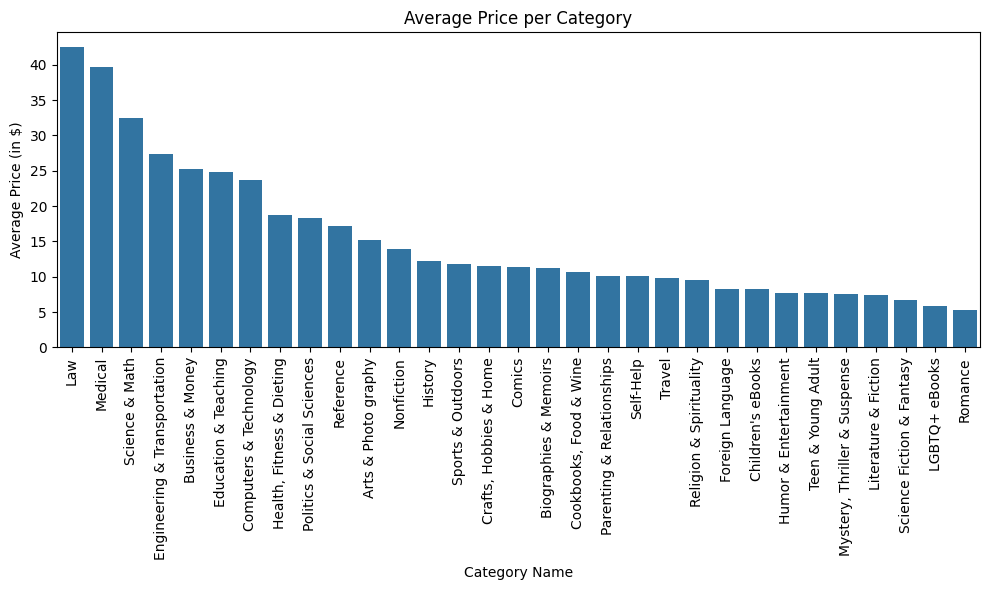

In [77]:
avg_price_per_category = df.groupby('category_name')['price'].mean().reset_index()
avg_price_per_category = avg_price_per_category.sort_values(by='price', ascending=False)

plt.figure(figsize=(10, 6))

sns.barplot(x='category_name', y='price', data=avg_price_per_category)

plt.title('Average Price per Category')
plt.xlabel('Category Name')
plt.ylabel('Average Price (in $)')
plt.xticks(rotation=90)  
plt.tight_layout()

plt.show()                           

Based on the latter I deduce that there is a relationship between the category and the price and that there could be other similar relationships with price and that they are affected too by the missing values. 
Therefore, given that the missing values in price are not a substantial amount of the dataset I decided to ignore them, and I will be eliminating them from a copy of the dataset to work with.
With this I only must decide what to do with the other missing values in reviews and stars.


As for stars since there is not a substantial number of missing values and that most rated book are more likely to not be very poorly reviewed I decided to impute them with the median.

Finaly for reviews since there is a lot of missing data and that the relationships seems minimal with the features other than stars i will ignore the whole column for the rest of this analysis.

Actual data cleaning and feature engeneering  
Here a will create a smaller dataset without the ignored features described above and without some other columns that we wont be using like the urls.

In [10]:
# Creation of a smaller dataset without the columns we wont be using
work_df = df.loc[:,['author','soldBy','stars','price','isKindleUnlimited','category_name','isBestSeller','isEditorsPick','isGoodReadsChoice','publishedDate']]
work_df.head()


,author,soldBy,stars,price,isKindleUnlimited,category_name,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate
0,Lindsay C. Gibson,Amazon.com Services LLC,4.8,9.99,False,Parenting & Relationships,True,False,False,2015-06-01
1,Arthur C. Brooks,Penguin Group (USA) LLC,4.4,16.99,False,Parenting & Relationships,False,False,False,2022-02-15
2,Becky Kennedy,HarperCollins Publishers,4.8,16.99,False,Parenting & Relationships,False,True,False,2022-09-13
3,Dolly Alderton,HarperCollins Publishers,4.2,9.95,True,Parenting & Relationships,False,True,False,2020-02-25
4,John Gottman,Random House LLC,4.7,13.99,False,Parenting & Relationships,False,False,False,2015-05-05


For easier handling of the missing values i will be replaceing all the ceroes on price and stars with pandas not a number NaN

In [11]:
work_df['price'] = work_df['price'].replace(0, pd.NA)
work_df['stars'] = work_df['stars'].replace(0, pd.NA)
work_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133102 entries, 0 to 133101
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   author             132677 non-null  object
 1   soldBy             123869 non-null  object
 2   stars              129920 non-null  object
 3   price              129036 non-null  object
 4   isKindleUnlimited  133102 non-null  bool  
 5   category_name      133102 non-null  object
 6   isBestSeller       133102 non-null  bool  
 7   isEditorsPick      133102 non-null  bool  
 8   isGoodReadsChoice  133102 non-null  bool  
 9   publishedDate      84086 non-null   object
dtypes: bool(4), object(6)
memory usage: 6.6+ MB


Eliminating missing values rows from price:

In [12]:
work_df =work_df.dropna(subset=['price'])
work_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129036 entries, 0 to 133099
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   author             128627 non-null  object
 1   soldBy             122322 non-null  object
 2   stars              125952 non-null  object
 3   price              129036 non-null  object
 4   isKindleUnlimited  129036 non-null  bool  
 5   category_name      129036 non-null  object
 6   isBestSeller       129036 non-null  bool  
 7   isEditorsPick      129036 non-null  bool  
 8   isGoodReadsChoice  129036 non-null  bool  
 9   publishedDate      81556 non-null   object
dtypes: bool(4), object(6)
memory usage: 7.4+ MB


Next i will be imputing the stars values.

In [78]:
median_stars = work_df.loc[work_df['stars'] > 0, 'stars'].median()
work_df['stars'] = work_df['stars'].replace(pd.NA, median_stars)
work_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 129036 entries, 0 to 133099
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   author                  128627 non-null  object        
 1   soldBy                  122322 non-null  object        
 2   stars                   129036 non-null  float64       
 3   price                   129036 non-null  float64       
 4   isKindleUnlimited       129036 non-null  int64         
 5   category_name           129036 non-null  object        
 6   isBestSeller            129036 non-null  int64         
 7   isEditorsPick           129036 non-null  int64         
 8   isGoodReadsChoice       129036 non-null  int64         
 9   publishedDate           81556 non-null   datetime64[ns]
 10  year                    81556 non-null   float64       
 11  month                   81556 non-null   float64       
 12  day                     81556 non-n

Following the feature engeneering i will transform the date column into three separate ones.

In [14]:
work_df['publishedDate'] = pd.to_datetime(df['publishedDate'], format='%Y-%m-%d')
work_df['year'] = work_df['publishedDate'].dt.year
work_df['month'] = work_df['publishedDate'].dt.month
work_df['day'] = work_df['publishedDate'].dt.day

work_df.head()

,author,soldBy,stars,price,isKindleUnlimited,category_name,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,year,month,day
0,Lindsay C. Gibson,Amazon.com Services LLC,4.8,9.99,False,Parenting & Relationships,True,False,False,2015-06-01,2015.0,6.0,1.0
1,Arthur C. Brooks,Penguin Group (USA) LLC,4.4,16.99,False,Parenting & Relationships,False,False,False,2022-02-15,2022.0,2.0,15.0
2,Becky Kennedy,HarperCollins Publishers,4.8,16.99,False,Parenting & Relationships,False,True,False,2022-09-13,2022.0,9.0,13.0
3,Dolly Alderton,HarperCollins Publishers,4.2,9.95,True,Parenting & Relationships,False,True,False,2020-02-25,2020.0,2.0,25.0
4,John Gottman,Random House LLC,4.7,13.99,False,Parenting & Relationships,False,False,False,2015-05-05,2015.0,5.0,5.0


To finish with the data cleaning and feature engenieering in will change all the boolean rows of the dataset to 0 and 1.


In [15]:
work_df = work_df.replace({True: 1, False: 0}).infer_objects(copy=False)
work_df.head()

C:\Users\arnol\AppData\Local\Temp\ipykernel_328\986787451.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  work_df = work_df.replace({True: 1, False: 0}).infer_objects(copy=False)


,author,soldBy,stars,price,isKindleUnlimited,category_name,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,year,month,day
0,Lindsay C. Gibson,Amazon.com Services LLC,4.8,9.99,0,Parenting & Relationships,1,0,0,2015-06-01,2015.0,6.0,1.0
1,Arthur C. Brooks,Penguin Group (USA) LLC,4.4,16.99,0,Parenting & Relationships,0,0,0,2022-02-15,2022.0,2.0,15.0
2,Becky Kennedy,HarperCollins Publishers,4.8,16.99,0,Parenting & Relationships,0,1,0,2022-09-13,2022.0,9.0,13.0
3,Dolly Alderton,HarperCollins Publishers,4.2,9.95,1,Parenting & Relationships,0,1,0,2020-02-25,2020.0,2.0,25.0
4,John Gottman,Random House LLC,4.7,13.99,0,Parenting & Relationships,0,0,0,2015-05-05,2015.0,5.0,5.0


Data insights:

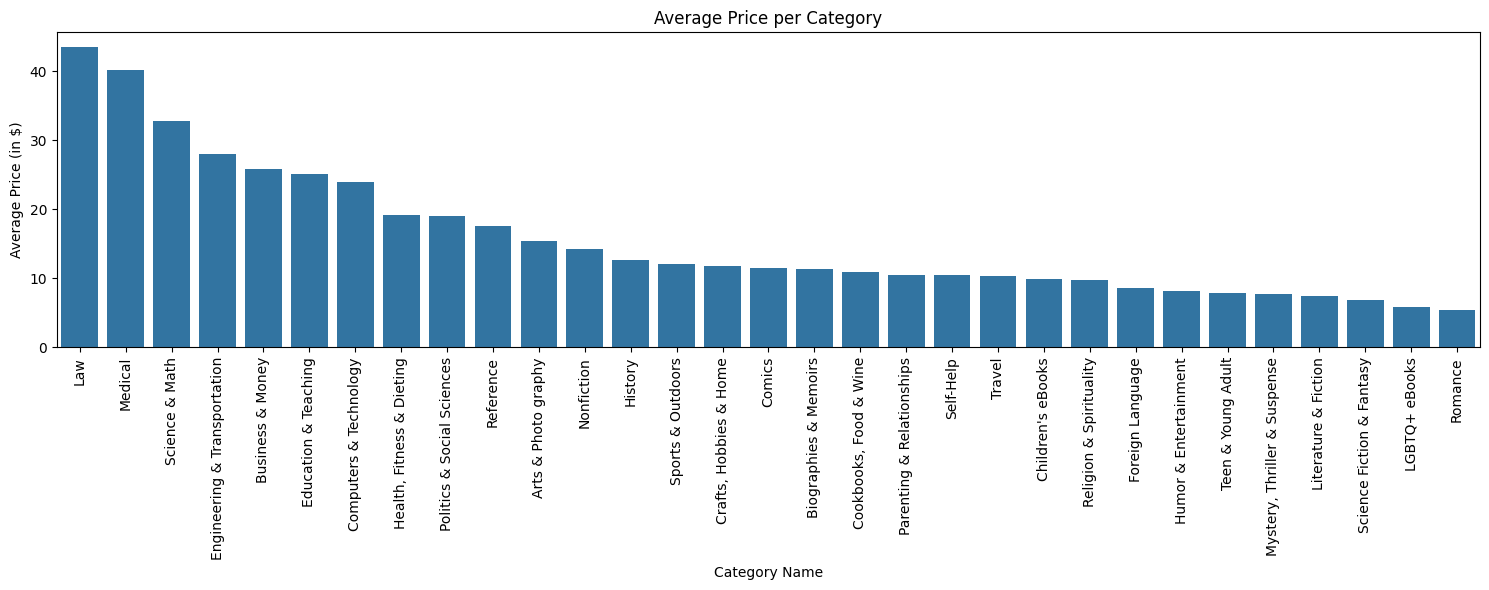

In [16]:
avg_price_per_category = work_df.groupby('category_name')['price'].mean().reset_index()
avg_price_per_category = avg_price_per_category.sort_values(by='price', ascending=False)

plt.figure(figsize=(15, 6))

sns.barplot(x='category_name', y='price', data=avg_price_per_category)

plt.title('Average Price per Category')
plt.xlabel('Category Name')
plt.ylabel('Average Price (in $)')
plt.xticks(rotation=90)  
plt.tight_layout()

plt.show()      

Based on the later chart we can easly determine that dending on the category there the price has a average varing price.  
There for if we were to publish a kindle book with the objective to obtain the higher price per book the best choices are the top price categories like law, medical and sicence and math.

In [17]:
print(work_df['stars'].mean())

4.512213645804272


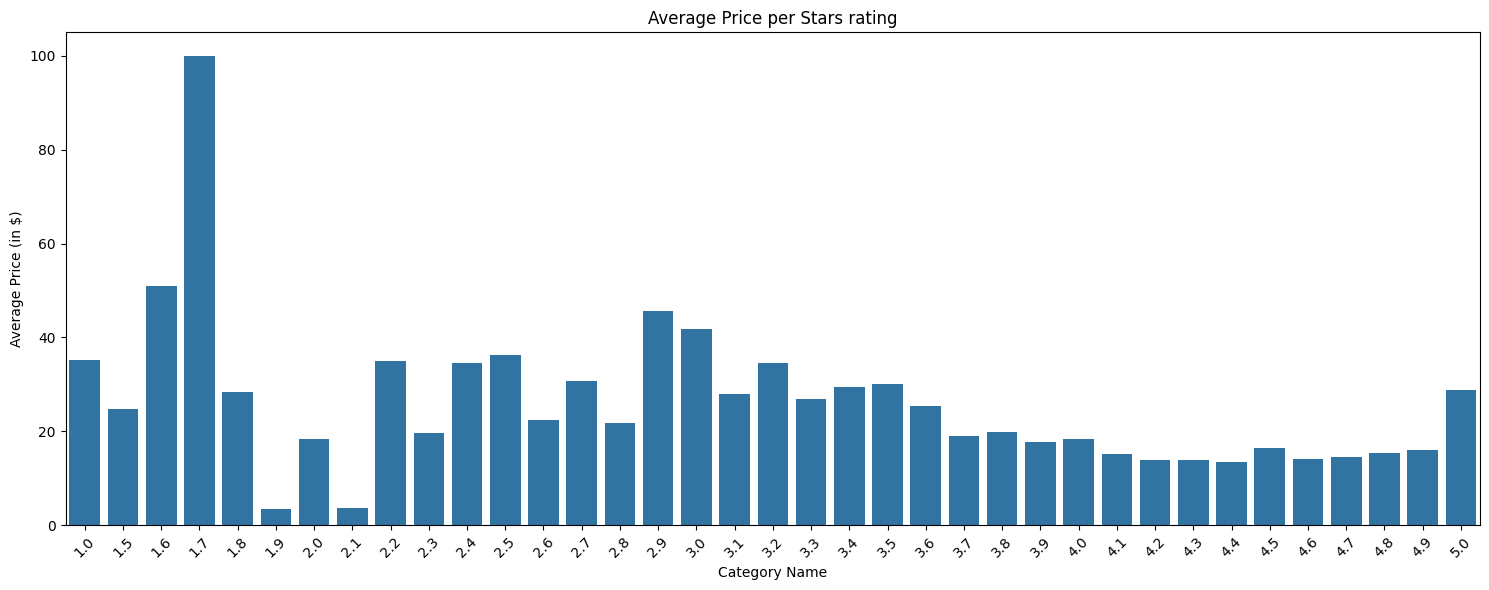

In [18]:
avg_price_per_stars_rating = work_df.groupby('stars')['price'].mean().reset_index()
avg_price_per_stars_rating = avg_price_per_stars_rating.sort_values(by='price', ascending=True)

plt.figure(figsize=(15, 6))

sns.barplot(x='stars', y='price', data=avg_price_per_stars_rating)

plt.title('Average Price per Stars rating')
plt.xlabel('Category Name')
plt.ylabel('Average Price (in $)')
plt.xticks(rotation=45)  
plt.tight_layout()

plt.show()   

In [20]:
stars_count = work_df['stars'].value_counts()
stars_count = stars_count.sort_index()
stars_count_equal_to_one = stars_count[stars_count == 1]
print(stars_count_equal_to_one)

stars
1.7    1
Name: count, dtype: int64


After analizyng the average price per star rating we can see that there is a isolated case of 1.7 stars that has the higher average price, but after futher analisys we can determine that it is not how it shows because it is composed of only one book.
That leaves us with the center part of the distribution with the higher average price.

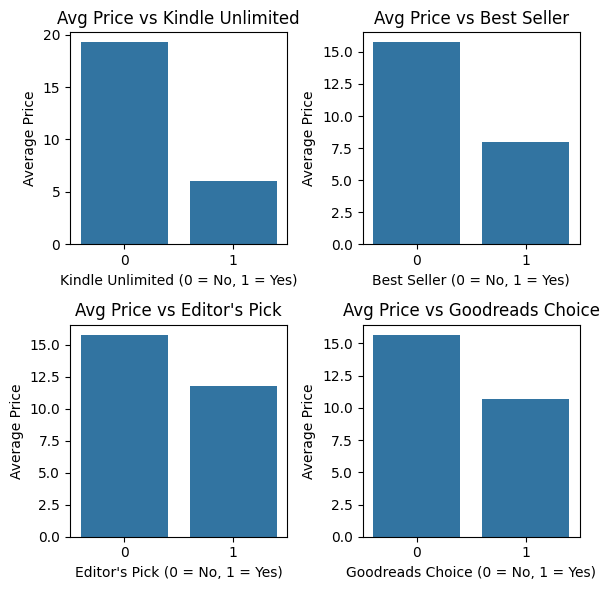

In [21]:
avg_price_kindle_unlimited = work_df.groupby('isKindleUnlimited')['price'].mean()
avg_price_best_seller = work_df.groupby('isBestSeller')['price'].mean()
avg_price_editors_pick = work_df.groupby('isEditorsPick')['price'].mean()
avg_price_goodreads_choice = work_df.groupby('isGoodReadsChoice')['price'].mean()

fig, axes = plt.subplots(2, 2, figsize=(6, 6))

sns.barplot(x=avg_price_kindle_unlimited.index, y=avg_price_kindle_unlimited.values, ax=axes[0, 0])
axes[0, 0].set_title('Avg Price vs Kindle Unlimited')
axes[0, 0].set_xlabel('Kindle Unlimited (0 = No, 1 = Yes)')
axes[0, 0].set_ylabel('Average Price')

sns.barplot(x=avg_price_best_seller.index, y=avg_price_best_seller.values, ax=axes[0, 1])
axes[0, 1].set_title('Avg Price vs Best Seller')
axes[0, 1].set_xlabel('Best Seller (0 = No, 1 = Yes)')
axes[0, 1].set_ylabel('Average Price')

sns.barplot(x=avg_price_editors_pick.index, y=avg_price_editors_pick.values, ax=axes[1, 0])
axes[1, 0].set_title("Avg Price vs Editor's Pick")
axes[1, 0].set_xlabel("Editor's Pick (0 = No, 1 = Yes)")
axes[1, 0].set_ylabel('Average Price')

sns.barplot(x=avg_price_goodreads_choice.index, y=avg_price_goodreads_choice.values, ax=axes[1, 1])
axes[1, 1].set_title('Avg Price vs Goodreads Choice')
axes[1, 1].set_xlabel('Goodreads Choice (0 = No, 1 = Yes)')
axes[1, 1].set_ylabel('Average Price')

plt.tight_layout()
plt.show()

In this chart we are analyzing the different average prices between the Boolean values of the dataset, and we can see that the kindle unlimited books have the lowest average price.  
This can be because they are included in a subscription-based collection of books.  
We also can see that the books that are EditorsPick, GoodReadsChoice and BestSeller also have a lower average price than the ones that are not.  
This may be because more accessible books tend to have a bigger public there for the more opportunities to be valued higher. 

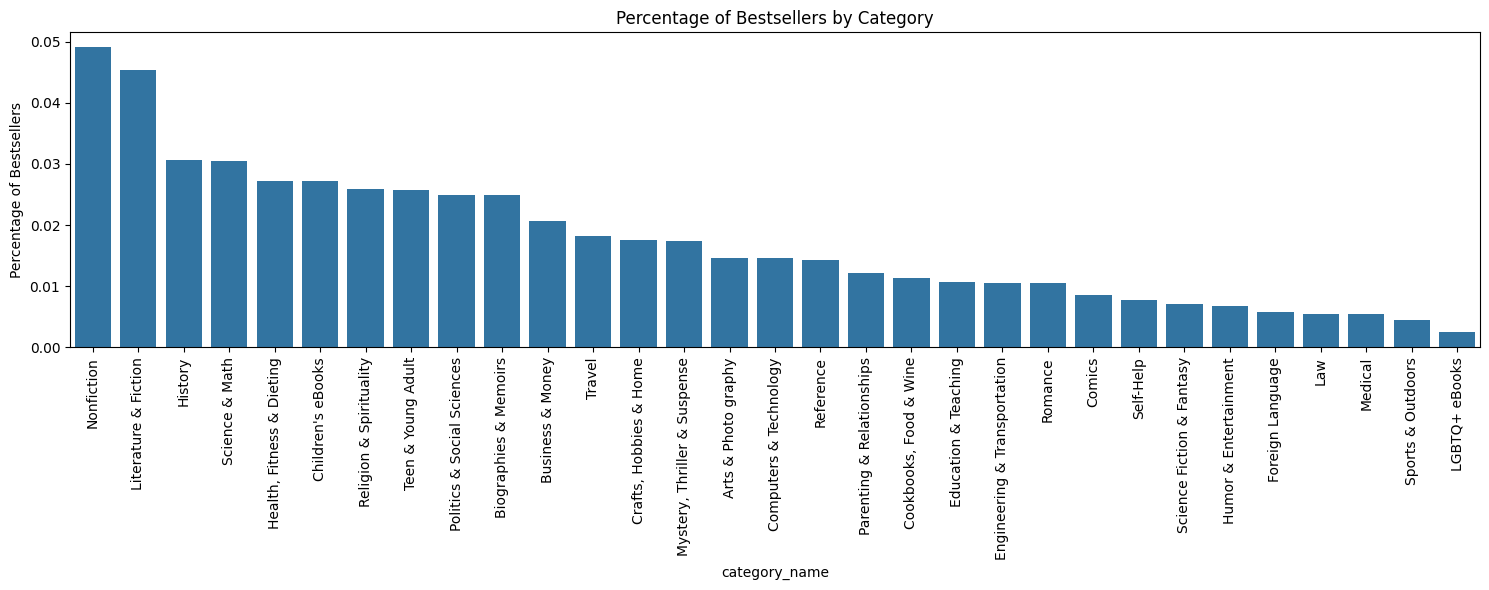

In [76]:
avg_rating_by_category = work_df.groupby('category_name')['stars'].mean().sort_values(ascending=False)
avg_bestseller_by_category = work_df.groupby('category_name')['isBestSeller'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 6))

sns.barplot(x=avg_bestseller_by_category.index, y=avg_bestseller_by_category.values)
plt.title('Percentage of Bestsellers by Category')
plt.ylabel('Percentage of Bestsellers')
plt.xticks(rotation=90) 

plt.tight_layout()
plt.show()

Analizyng the charts we can see that if we are aming to have the best rating we dont neeed to worry as much for wich category we choose because the average rating variation is negligable between categories.
A for the best Sellers per Category we can easily see that if we want to publish a kindle book to be a best seller our best chances are with the Non Fiction and the Literture and fiction categories.

C:\Users\arnol\AppData\Local\Temp\ipykernel_328\1688463875.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bestseller_count = work_df.groupby('price_range')['isBestSeller'].sum()
C:\Users\arnol\AppData\Local\Temp\ipykernel_328\1688463875.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage_bestsellers_sorted.index, y=percentage_bestsellers_sorted.values, palette='Greens')


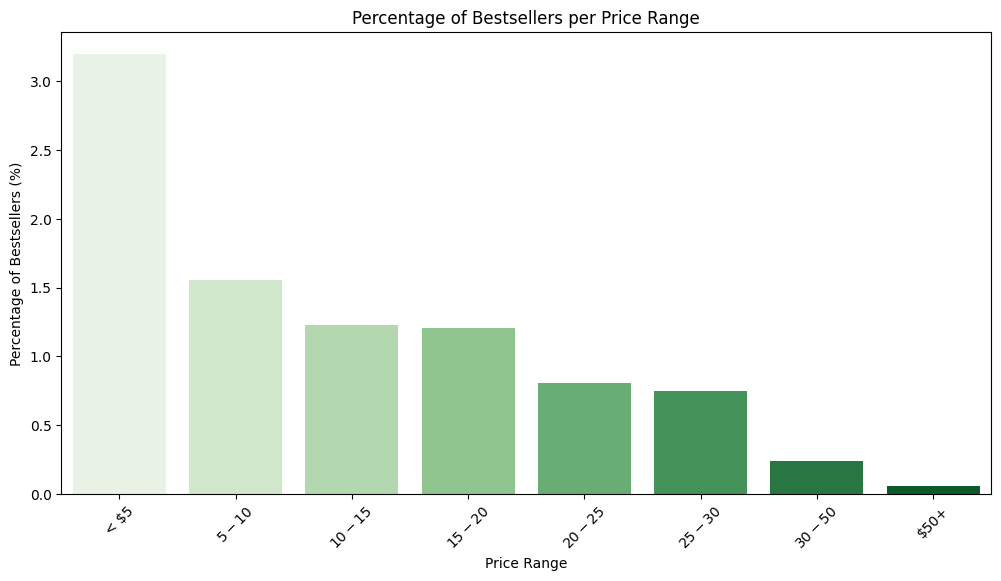

In [67]:
bins = [0, 5, 10, 15, 20, 25, 30, 50, 100]  # Adjust ranges as needed
labels = ['< $5', '$5 - $10', '$10 - $15', '$15 - $20', '$20 - $25', '$25 - $30', '$30 - $50', '$50+']
work_df['price_range'] = pd.cut(work_df['price'], bins=bins, labels=labels, right=False)
bestseller_count = work_df.groupby('price_range')['isBestSeller'].sum()
total_count = work_df['price_range'].value_counts()
percentage_bestsellers = (bestseller_count / total_count) * 100
percentage_bestsellers_sorted = percentage_bestsellers.sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=percentage_bestsellers_sorted.index, y=percentage_bestsellers_sorted.values, palette='Greens')
plt.title('Percentage of Bestsellers per Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Bestsellers (%)')
plt.xticks(rotation=45)
plt.show()

Continuing with the Best seller’s analysis we can see that as well as choosing the correct category the best way of publishing a kindle book to be a best seller the best option is to price it in a moderate price range and the lower the better.
Here we can also include the later analysis of the average price range of bestseller books to draw the same conclusion.


Hypotheses:

Hypothesis 1:  
H₀: Books priced below $5 are not more likely to be bestsellers compared to books priced $5 or above.  
H₁: Books priced below $5 are more likely to be bestsellers compared to books priced $5 or above.

Hypothesis 2:    
H₀: Certain categories have a higher proportion of bestsellers compared to other categories.  
H₁: There is no significant difference in the proportion of bestsellers across different categories.  

Hypothesis 3:  
H₀: There is no significant difference in the average price across different categories.  
H₁: At least one category has a significantly different average price compared to others.

I will be significance testing my hypothesis 1 but first i will check the distribution of my data since several test asume a normal distribution.

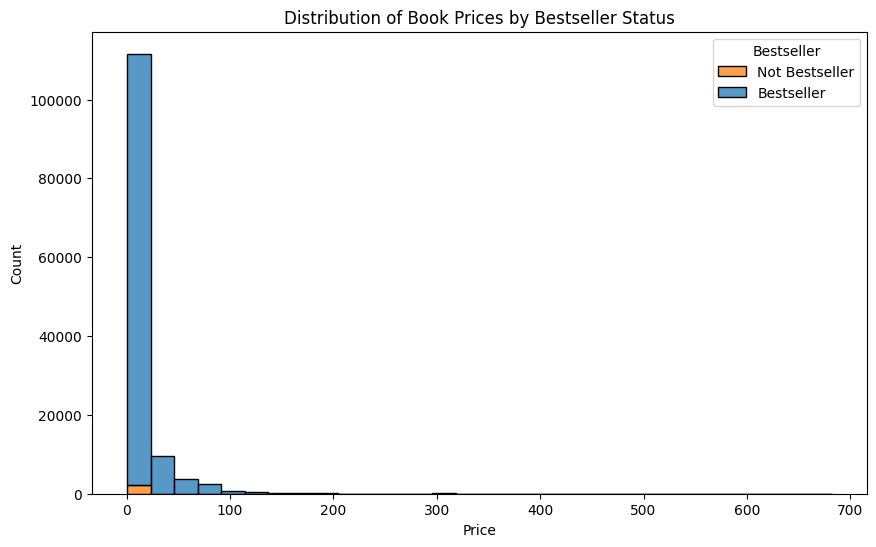

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data=work_df, x='price', hue='isBestSeller', multiple='stack', bins=30)
plt.title('Distribution of Book Prices by Bestseller Status')
plt.xlabel('Price')
plt.ylabel('Count')
plt.legend(title='Bestseller', labels=['Not Bestseller', 'Bestseller'])
plt.show()

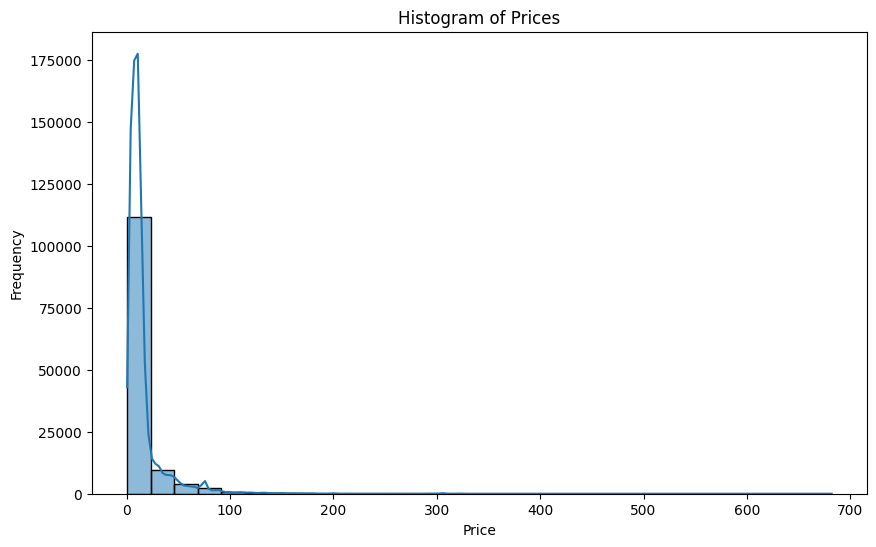

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(work_df['price'], bins=30, kde=True)
plt.title('Histogram of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

As we can se the data is heavily skwed so i will be realizing a log transformation on the prices.

In [29]:
work_df['log_price'] = np.log(df['price'] + 1)  # Adding 1 to avoid log(0)


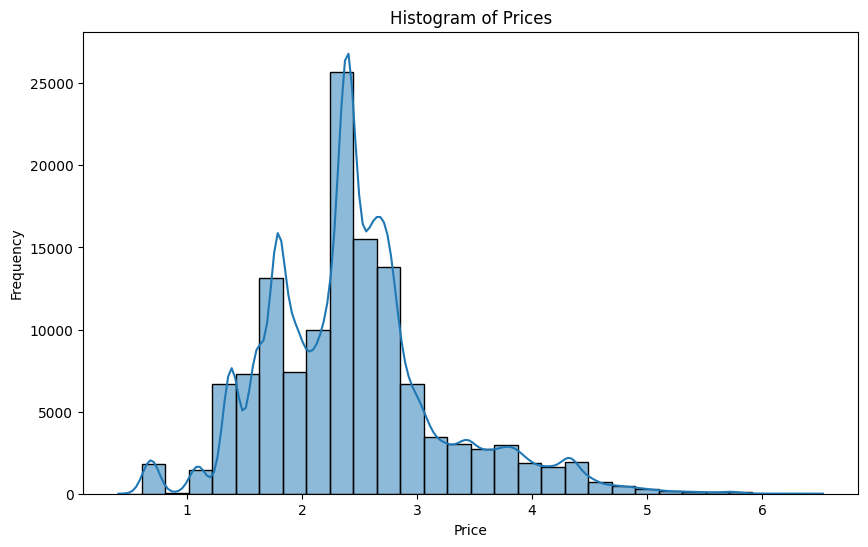

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(work_df['log_price'], bins=30, kde=True)
plt.title('Histogram of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

With that out of the way we can continue to test our hypithesis with a z-test.

In [79]:
below_5 = work_df.loc[work_df['log_price'] <= np.log(5)]
above_or_equal_5 = work_df.loc[work_df['log_price'] > np.log(5)]
# Proportion of bestsellers
p1 = below_5['isBestSeller'].mean() 
p2 = above_or_equal_5['isBestSeller'].mean()  
# Amount of books
n1 = len(below_5) 
n2 = len(above_or_equal_5) 
# Count of best sellers 
x1 = below_5['isBestSeller'].sum()
x2 = above_or_equal_5['isBestSeller'].sum()

pooled_proportion = (x1 + x2) / (n1 + n2)
se = np.sqrt(pooled_proportion * (1 - pooled_proportion) * ((1 / n1) + (1 / n2)))
z_score = (p1 - p2) / se
p_value = norm.sf(z_score)

# Now calculate the one-tailed p-value
print("Hypothesis:\nH₀ (Null Hypothesis): Books priced below $5 are not more likely to be bestsellers compared to books priced $5 or above.\nH₁ (Alternative Hypothesis): Books priced below $5 are more likely to be bestsellers compared to books priced $5 or above.")
print("p1:",p1)
print("p2:",p2)
print("n1:",n1)
print("n2:",n2)
print("x1:",x1)
print("x2:",x2)
alpha = 0.05
if p_value < alpha:
    print(f"Reject the null hypothesis: p-value = {p_value}")
else:
    print(f"Fail to reject the null hypothesis: p-value = {p_value}")


Hypothesis:
H₀ (Null Hypothesis): Books priced below $5 are not more likely to be bestsellers compared to books priced $5 or above.
H₁ (Alternative Hypothesis): Books priced below $5 are more likely to be bestsellers compared to books priced $5 or above.
p1: 0.04000923734195485
p2: 0.012988408002506379
n1: 17321
n2: 111715
x1: 693
x2: 1451
Reject the null hypothesis: p-value = 4.773364254624598e-148


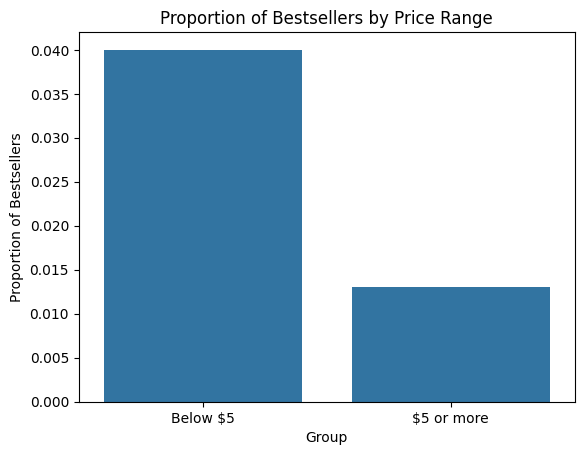

In [66]:
proportions = pd.DataFrame({
    'Group': ['Below $5', '$5 or more'],
    'Proportion of Bestsellers': [p1, p2]
})

sns.barplot(x='Group', y='Proportion of Bestsellers', data=proportions)
plt.title('Proportion of Bestsellers by Price Range')
plt.show()
